<a href="https://colab.research.google.com/github/YungKing1224/Python-data-science/blob/main/ml_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**


Embarking on the mission to rescue the passengers of the Spaceship Titanic holds profound significance:

1. Humanitarian Imperative: Saving lives is paramount.
  
2. Preservation of History: Each soul aboard carries a story worth preserving.

3. Advancement of Knowledge: Data science aids rescue efforts and furthers cosmic understanding.

4. Spirit of Exploration: It embodies humanity's drive to confront the unknown.

In essence, this mission is a testament to our commitment to humanity, history, knowledge, and exploration.

In [1]:
##https://www.kaggle.com/competitions/spaceship-titanic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Library System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Library data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Jupyter Notebook Version:', python_version())

Jupyter Notebook Version: 3.10.12


In [3]:
# Load a dataset into a Pandas Dataframe
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.shape

(8693, 14)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Duplicate train data set for analysis

In [9]:
df_train2 = df_train.copy()
df_train2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


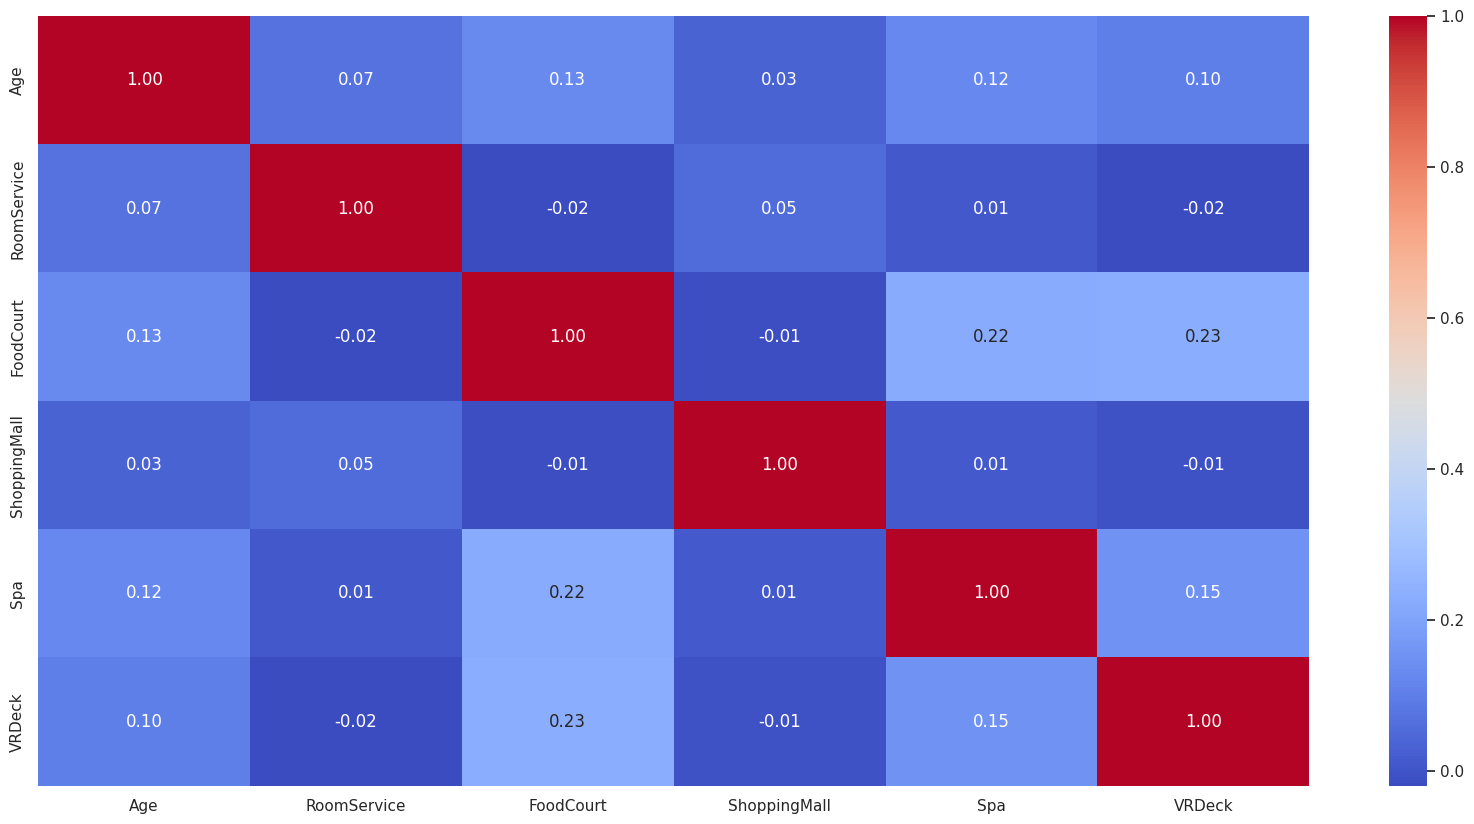

In [10]:
# Select only numeric columns
numeric_data = df_train2.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(20.5, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

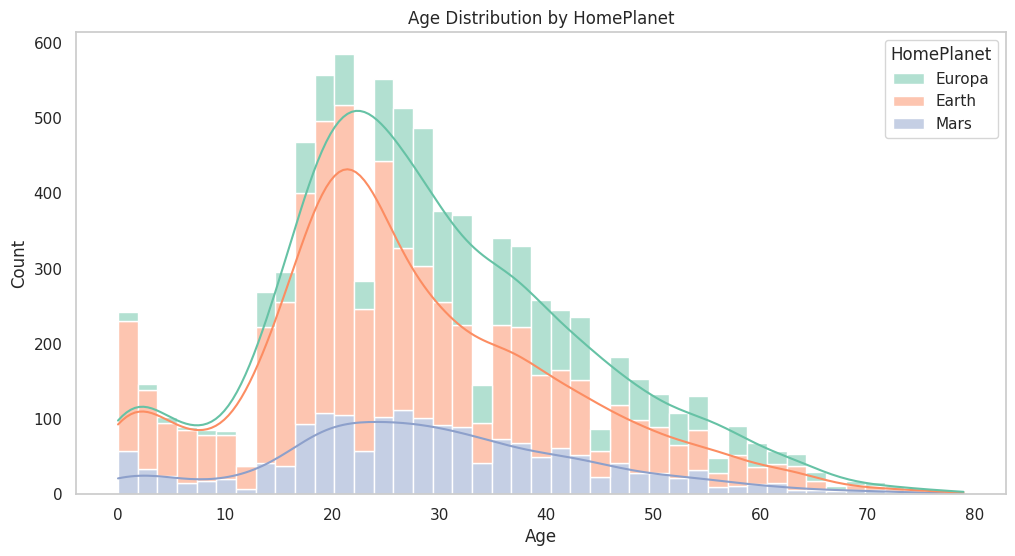

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train2, x='Age', hue='HomePlanet', multiple='stack', palette='Set2', kde=True)
plt.title('Age Distribution by HomePlanet')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 Here we can observe the ages of passengers from Europe, Earth, and Mars. This analysis allows us to understand the age distribution among different origins, providing valuable insights into the demographics of interplanetary travelers. By examining the ages of the passengers, we can identify trends and patterns, such as the predominance of certain age groups on each planet, which can influence future travel planning, marketing, and accommodation policies. Additionally, this analysis can help identify specific needs of each age group, such as entertainment preferences, health and wellness requirements, and educational demands. Finally, this detailed understanding can contribute to the development of personalized strategies to improve passenger experience and optimize the services offered.

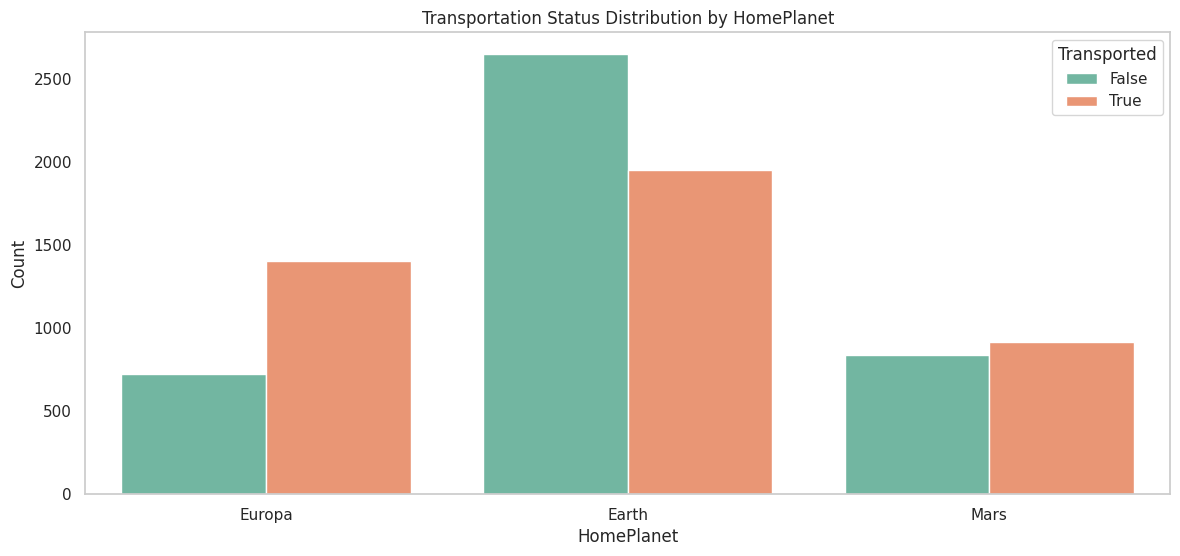

In [12]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train2, x='HomePlanet', hue='Transported', palette='Set2')
plt.title('Transportation Status Distribution by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In this graph, we can observe the distribution of transportation among the three planets: Earth, Jupiter's moon Europa, and Mars.

This visualization provides us with a detailed understanding of transportation patterns between different celestial bodies. By analyzing the distribution of transportation modes used, we can identify interesting trends, such as the predominance of certain modes of transportation on each planet. This can provide valuable insights into transportation infrastructures at each location and the travel preferences of local inhabitants and interplanetary visitors.

Furthermore, by comparing transportation modalities among the three planets, we can highlight significant differences that may be related to factors such as available technology, planetary geography, and socioeconomic development. This comparative analysis helps us better understand transportation dynamics in diverse planetary contexts and can guide transportation policies and infrastructure investments.

Finally, by examining the distribution of transportation to different interplanetary destinations, we can speculate on the impact of these patterns on interplanetary connectivity, space tourism, and scientific exploration. This helps us anticipate future transportation needs and strategically plan to promote efficient and sustainable mobility in space.

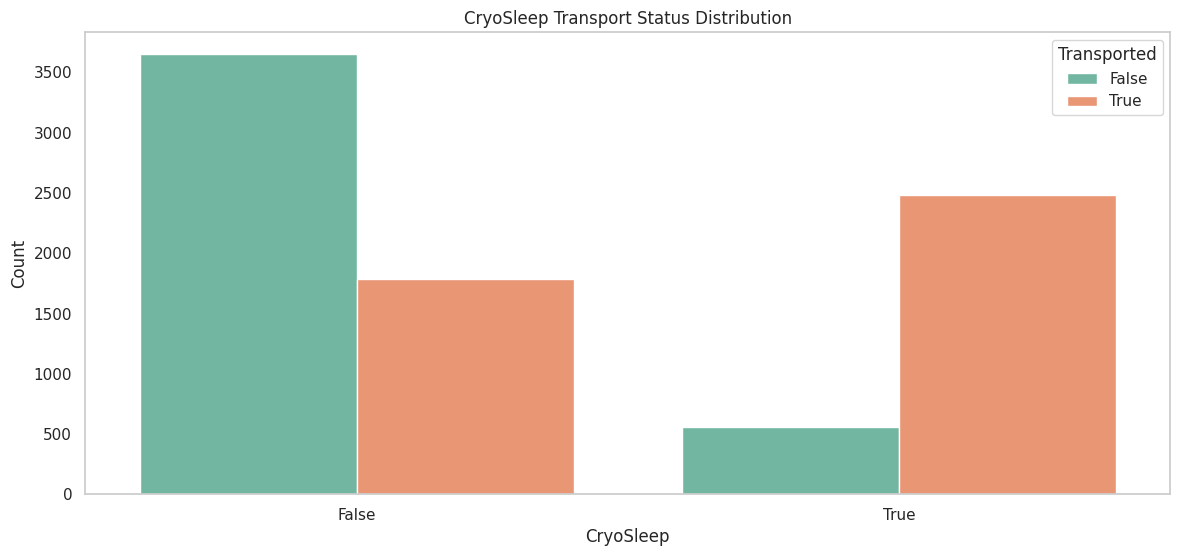

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train2, x='CryoSleep', hue='Transported', palette='Set2')
plt.title('CryoSleep Transport Status Distribution')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In this graph, we can visualize the target column according to the transportation status.

This visualization allows us to examine the relationship between the target variable and transportation status, providing valuable insights into how transportation is associated with the desired outcome. By analyzing this association, we can identify patterns and trends that help us better understand the factors influencing the target column's status. This includes not only the effectiveness of different transportation modes in achieving the desired outcome but also any correlations between transportation status and other important variables. Additionally, by examining transportation status in relation to the target column, we can identify areas of opportunity for improvements in the transportation system, if necessary. This may involve route optimization, the introduction of new transportation services, or improving accessibility for certain demographic groups.

Finally, by understanding the relationship between the target column and transportation status, we can develop more effective strategies to achieve desired outcomes, whether related to business objectives, public health goals, or any other specific study objective. This analysis helps us make more informed decisions and allocate resources more efficiently to achieve the desired success.

In [14]:
# Sum of expenses on amenities
df_train2['TotalSpending'] = df_train2['RoomService'] + df_train2['FoodCourt'] + df_train2['ShoppingMall'] + df_train2['Spa'] + df_train2['VRDeck']

# Relationship between age and VIP status
df_train2['Age/VIP'] = df_train2['Age'] / (df_train2['VIP'] + 1)

# Create a feature indicating the size of the travel group
df_train2['GroupSize'] = df_train2['PassengerId'].apply(lambda x: int(x.split('_')[0]))
group_sizes = df_train2['GroupSize'].value_counts().to_dict()
df_train2['GroupSize'] = df_train2['GroupSize'].map(group_sizes)

 Here, we've applied a filter to examine the relationship between spending on amenities and VIP status, as well as investigating the correlation between age and VIP status. Additionally, we've created a new feature indicating the size of the travel group.

This more refined analysis allows us to delve deeper into the interactions between different variables and their impact on desired outcomes. By examining the relationship between spending on amenities and VIP status, we can determine if there's a significant correlation between these two factors, which may influence targeted marketing strategies for VIP clients. Furthermore, by investigating the relationship between age and VIP status, we can identify demographic patterns that can inform decisions regarding market segmentation and service customization.

The inclusion of the new feature indicating the size of the travel group enables us to consider group dynamics when analyzing passenger behavior. This can be crucial for understanding collective travel preferences and tailoring service offerings to meet the specific needs of these groups.

In summary, by deepening our analysis with these additional filters and features, we're better equipped to extract valuable insights and make more informed decisions to enhance customer experience and optimize business operations.

In [15]:
fig = px.scatter(df_train2, x='RoomService', y='FoodCourt', color='Transported',
                 hover_data=['PassengerId', 'Age', 'HomePlanet'])
fig.update_layout(title='Scatter Plot of Spending in RoomService and FoodCourt')

fig.show()

In this graph, we present an interactive scatterplot showing spending on Room Service and Food Court. In this plot, the points furthest away represent outlier cases. This dynamic visualization allows us to explore the relationship between spending on room service and food court interactively. By examining the dispersion of the points, we can identify patterns and trends that help us better understand how these variables are related. The outliers, represented by the furthest points, highlight uncommon observations that deviate significantly from the general pattern. These outlier cases may indicate distinct behaviors or extraordinary events that warrant further investigation. Furthermore, with the interactivity offered by the scatterplot, we can explore each point individually to obtain additional contextual information, such as specific dates, types of customers, or special events. This enriches our understanding of the data and enables us to extract more meaningful insights to inform strategic decisions. Ultimately, this visualization not only helps us identify outliers and better understand the relationship between spending on Room Service and Food Court, but also empowers us to take appropriate actions based on the information obtained, such as adjusting marketing strategies, revising pricing policies, or enhancing services to better meet customer needs.

In [16]:
fig = px.scatter(df_train2, x='ShoppingMall', y='Spa', color='Transported',
                 hover_data=['PassengerId', 'Age', 'HomePlanet'])
fig.update_layout(title='Scatter Plot of Spending in ShoppingMall and Spa')

fig.show()

In [17]:
df_train2.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpending', 'Age/VIP', 'GroupSize'],
      dtype='object')

In [18]:
fig = px.scatter(df_train2, x='TotalSpending', y='Age/VIP', color='Transported', hover_data=['PassengerId', 'Age', 'HomePlanet', 'GroupSize'], title='Scatter Plot of Sum of Spending and Age/VIP')
fig.show()

In this indicator, we can visualize the sums of spending made by the VIP class during space travel. This analysis provides crucial insights into the spending behavior of VIP class passengers during their interplanetary journeys. By examining spending sums, we can identify consumption patterns, preferences for premium services or products, and even seasonal or geographical trends that may influence the purchasing decisions of VIP passengers. Additionally, by comparing the spending sums of the VIP class with other passenger segments, we can better understand the economic impact of this specific clientele on the space travel market. This can help guide targeted marketing strategies and the development of tailored offerings to meet the needs and expectations of VIP customers. This comprehensive analysis of spending sums by the VIP class during space travel helps us gain a fuller understanding of the luxury space travel market and identify opportunities for growth and service enhancement to cater to this exclusive segment of discerning customers.

In [19]:
# Create the sum of expenses on amenities
df_train2['TotalSpending'] = df_train2['RoomService'] + df_train2['FoodCourt'] + df_train2['ShoppingMall'] + df_train2['Spa'] + df_train2['VRDeck']

# Create spending proportions
df_train2['RoomService_ratio'] = df_train2['RoomService'] / (df_train2['TotalSpending'] + 1)
df_train2['FoodCourt_ratio'] = df_train2['FoodCourt'] / (df_train2['TotalSpending'] + 1)
df_train2['ShoppingMall_ratio'] = df_train2['ShoppingMall'] / (df_train2['TotalSpending'] + 1)
df_train2['Spa_ratio'] = df_train2['Spa'] / (df_train2['TotalSpending'] + 1)
df_train2['VRDeck_ratio'] = df_train2['VRDeck'] / (df_train2['TotalSpending'] + 1)

# Create an indicator if the passenger is traveling with family (assuming group members are family)
df_train2['Family'] = df_train2['PassengerId'].apply(lambda x: int(x.split('_')[1]) > 1)

# Remove the deck and cabin
df_train2['Deck'] = df_train2['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else 'Unknown')
df_train2['CabinNum'] = df_train2['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else 'Unknown')

# Calculate cabin occupancy
cabin_occupancy = df_train2['CabinNum'].value_counts().to_dict()
df_train2['CabinOccupancy'] = df_train2['CabinNum'].map(cabin_occupancy)

# Normalize age
df_train2['NormalizedAge'] = (df_train2['Age'] - df_train2['Age'].mean()) / df_train2['Age'].std()

# Estimate travel time based on destination
# We assume some travel time values ​​for destinations as an example
destination_times = {'TRAPPIST-1e': 10, '55 Cancri e': 20, 'PSO J318.5-22': 30}
df_train2['TravelTime'] = df_train2['Destination'].apply(lambda x: destination_times[x] if x in destination_times else 0)

# Viewing
df_train2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourt_ratio,ShoppingMall_ratio,Spa_ratio,VRDeck_ratio,Family,Deck,CabinNum,CabinOccupancy,NormalizedAge,TravelTime
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,False,B,0,18,0.702054,10
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.012212,0.033921,0.744912,0.059701,False,F,0,18,-0.333213,10
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.344376,0.000000,0.646668,0.004719,False,A,0,18,2.013391,10
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.247827,0.071663,0.643037,0.037280,True,A,0,18,0.287947,10
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0.064103,0.138278,0.517399,0.001832,False,F,1,15,-0.885355,10


Here, we apply a filter to create some indicators that enhance our data analysis. By filtering the data, we were able to direct our attention to specific aspects that are relevant to our investigation. These indicators provide us with valuable insights and allow for deeper analysis of the patterns and trends present in the data. Additionally, by creating these indicators, we can further explore the relationships between different variables and better understand the factors that influence the results we are seeking. This helps us identify opportunities, challenges and areas of focus for future analysis and action. These indicators also enable us to communicate our findings more clearly and effectively, enabling more informed and evidence-based decision making. Ultimately, they help us extract the most value possible from available data and gain meaningful insights to drive our objectives and goals.

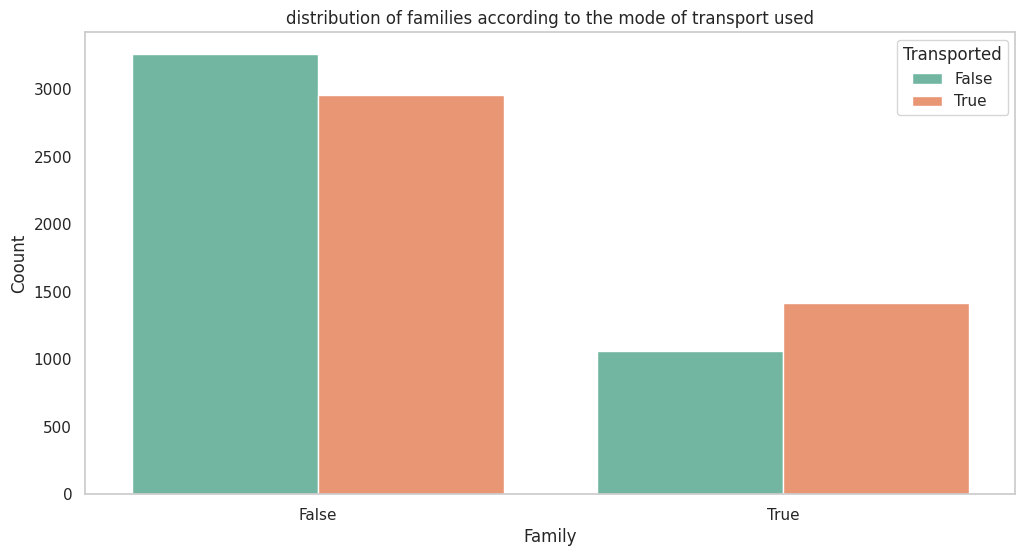

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train2, x='Family', hue='Transported', palette='Set2')
plt.title('distribution of families according to the mode of transport used')
plt.xlabel('Family')
plt.ylabel('Coount')
plt.grid(False)
plt.show()

In this graph, we explore the distribution of families according to the mode of transport used.

This analysis allows us to understand how families are distributed in relation to the different modes of transport available. By looking at this distribution, we can identify patterns and trends that can help us better understand families' travel preferences. Additionally, by examining the distribution of families by transportation, we can explore issues such as the accessibility of different transportation modes for families, travel preferences across different age groups and family sizes, and even possible correlations with popular travel estinations for families.

This more complete analysis enables us to develop more effective strategies to meet the needs of traveling families, whether through better suited transportation offerings, personalized services or initiatives to improve the overall travel experience for families.

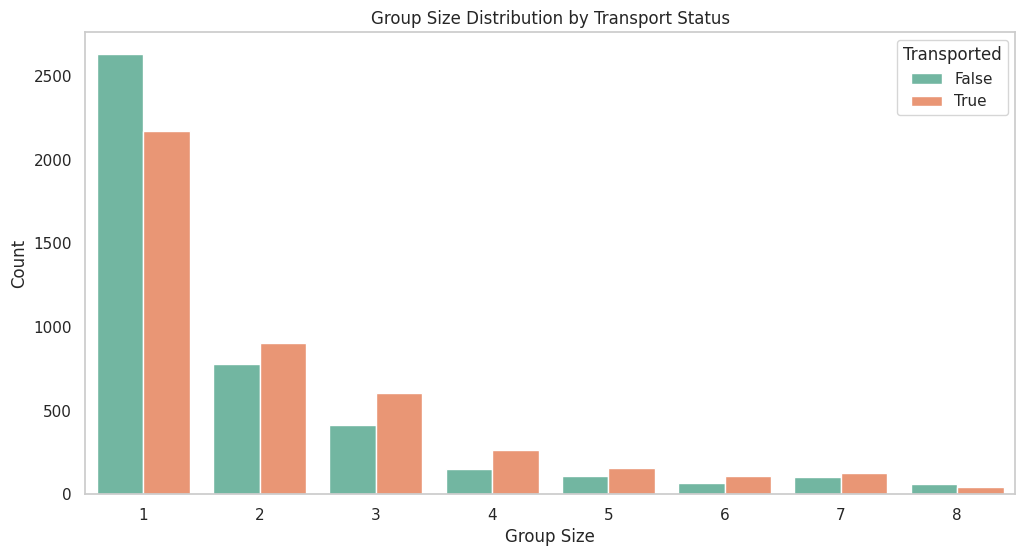

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train2, x='GroupSize', hue='Transported', palette='Set2')
plt.title('Group Size Distribution by Transport Status')
plt.xlabel('Group Size')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Analysis: In this graph, we can observe the Distribution of Group Size by Transport Status, segmented by the size of the travel group. This visualization provides a comprehensive understanding of group size dynamics in relation to transport status, allowing for a detailed analysis of passenger preferences and behaviors. By examining how group size varies across different categories of transport status, we can identify distinct patterns and trends that help us better understand how these variables are interrelated.

Additionally, by segmenting this distribution by the size of the travel group, we can gain additional insights into how the number of people in a group influences their transport choices and associated status. This may include family travel patterns, individual versus group travel, and even the impact of group size on available accommodation and transport options. Through this more comprehensive analysis, we can gain valuable insights to optimize marketing strategies, capacity planning, and service development to meet the varied needs of groups of different sizes and transport statuses.

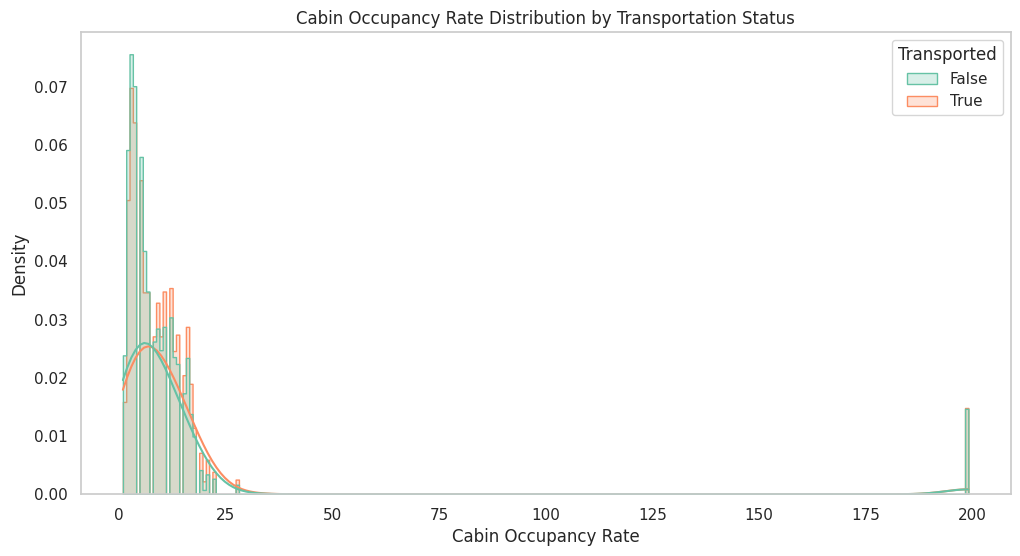

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train2, x='CabinOccupancy', hue='Transported', kde=True, element='step', stat='density', palette='Set2')
plt.title('Cabin Occupancy Rate Distribution by Transportation Status')
plt.xlabel('Cabin Occupancy Rate')
plt.ylabel('Density')
plt.grid(False)
plt.show()

In this graph, we explore the Distribution of Cabin Occupancy Rate according to Transport Status, segmented by Cabin Occupancy Rate, that is, the values ​​of spacecraft cabins. This analysis provides a comprehensive view of cabin occupancy in relation to transportation status as well as different cabin occupancy levels. By examining this distribution, we can not only identify occupancy patterns associated with different transportation statuses, but also understand how cabin values ​​influence occupancy and, consequently, the type of travel experience provided. Furthermore, by considering the relationship between cabin occupancy rate and transportation status, we can explore issues such as demand for different cabin classes in different travel contexts, passenger preferences regarding amenities and services offered in each category. cabin, and even socioeconomic factors that can influence passengers' travel choices. This more complete analysis enables us to better understand cabin occupancy dynamics and make informed decisions to optimize cabin availability, adjust pricing strategies and enhance the overall travel experience to meet the needs and expectations of passengers across different travel segments. Marketplace.

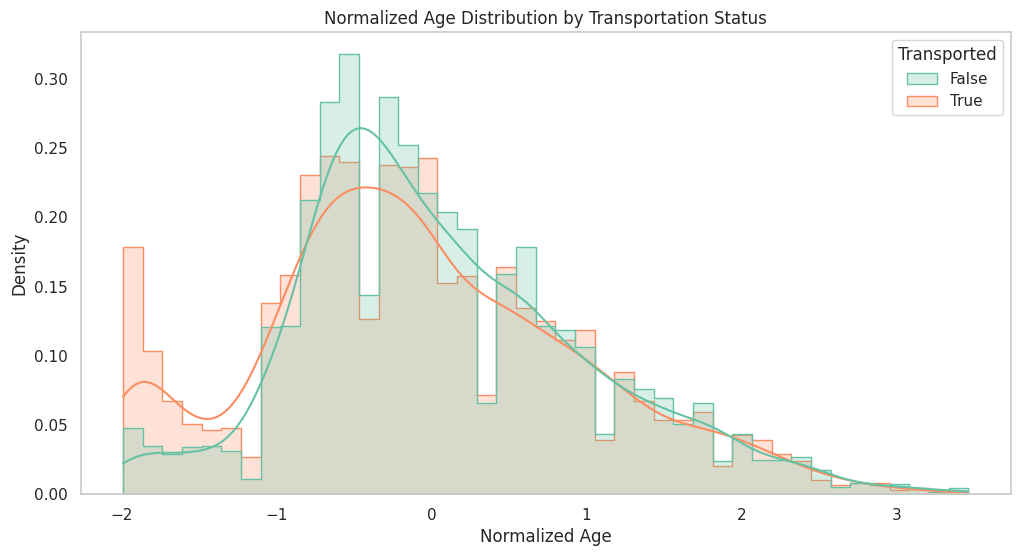

In [23]:
plt.figure(figsize=(12, 6))
plt.title('Normalized Age Distribution by Transportation Status')
sns.histplot(data=df_train2, x='NormalizedAge', hue='Transported', kde=True, element='step', stat='density', palette='Set2')
plt.xlabel('Normalized Age')
plt.ylabel('Density')
plt.grid(False)
plt.show()

In this graph, we can analyze the normalized ages, grouped by the minimum age established at 25 years.

This analysis allows us to understand how the ages of passengers are distributed in relation to a minimum limit of 25 years. By normalizing ages and grouping them in this way, we can highlight patterns and trends that may not be evident when looking at the data in raw form.

Furthermore, by grouping ages in this way, we can explore issues such as age distribution across different demographics, the prevalence of certain age groups in relation to the established threshold, and even possible correlations with other demographic or behavioral data.

This more detailed analysis enables us to extract valuable insights into the age composition of passengers relative to a specific minimum age threshold, helping us to better understand traveler demographics and adapt marketing strategies, services and policies to meet their needs. and expectations of these specific demographic groups.

In [24]:
# Importing label encoder library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df_train['HomePlanet2'] = label_encoder.fit_transform(df_train['HomePlanet'])
df_train['Cabin2'] = label_encoder.fit_transform(df_train['Cabin'])
df_train['Destination2'] = label_encoder.fit_transform(df_train['Destination'])
df_train['VIP2'] = label_encoder.fit_transform(df_train['VIP'])
df_train['Transported2'] = label_encoder.fit_transform(df_train['Transported'])

# Viewing label encoder
label_encoder

LabelEncoder()

In [25]:
# Copy the original data to avoid modifying the original DataFrame
train_data_encoded = df_train.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical variable
for col in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    train_data_encoded[col] = label_encoder.fit_transform(train_data_encoded[col])

# Viewing dataset
label_encoder

LabelEncoder()

Part 2

In [26]:
# View the first DataFrame records after encoding
train_data_encoded.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet2,Cabin2,Destination2,VIP2,Transported2
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,149,2,0,0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,2184,2,0,1
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,2,1,0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1,2,0,0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,2186,2,0,1


Part 2

In [27]:
# Delete the 'Name' column, for example
train_data_encoded.drop(columns=['Name'], inplace=True)

# View the first records of the DataFrame after column deletion
train_data_encoded.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet2,Cabin2,Destination2,VIP2,Transported2
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,149,2,0,0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,2184,2,0,1
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,1,1,2,1,0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,1,1,2,0,0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0,2186,2,0,1


Analysis

We applied the Label Encoder to the categorical variables, transforming them into numerical values. This transformation resulted in the creation of a new feature called Transported2. The encoding process is essential because many machine learning algorithms require input variables to be numerical to function correctly.

The Transported2 variable will be used as an alternative to the original Transported variable. By transforming categorical variables into numerical ones, we ensure that the model can interpret and process this data effectively. This is particularly important for non-ordinal categorical variables, where each category is converted into a distinct number without implying an order.

Additionally, the new Transported2 feature will allow us to evaluate whether this transformation positively influences the performance of the predictive models. By comparing the results obtained using the original variable and the transformed variable, we can determine which approach offers better predictions. This process is part of a broader feature engineering strategy aimed at optimizing input data to improve the accuracy and robustness of machine learning models.

In [28]:
# Fill missing values
train_data_encoded.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

In [29]:
# Select features
features = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X = train_data_encoded[features]
y = train_data_encoded['Transported']

In [30]:
# Viewing rows and columns x
X.shape

(8693, 8)

In [31]:
# Viewing rows and columns
y.shape

(8693,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

In [32]:
# Importing library
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Visualize lines and columns X_train", X_train.shape)

# Viewing rows and columns
print("Visualize lines and columns y_train", y_train.shape)

Visualize lines and columns X_train (6954, 8)
Visualize lines and columns y_train (6954,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

In [33]:
import pandas as pd

# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check data types
print(X_train.dtypes)
print(y_train.dtypes)

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
0
CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object
bool


In [34]:
print(X_train.dtypes)

CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


In [35]:
print(y_train.dtypes)

bool


y_train is a boolean so we have to convert it into numeric. We did this as XGBClassifier would not be calculated with a non-numeric value available.

In [36]:
# Importing machine learning model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Importing library for metrics machine learning models
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Ensure there are no missing values
assert not X_train.isnull().values.any(), "X_train contains missing values"
assert not y_train.isnull().values.any(), "y_train contains missing values"

# Ensure all data is numeric
assert all(np.issubdtype(dtype, np.number) for dtype in X_train.dtypes), "X_train contains non-numeric data"

# Convert y_train to numeric if necessary
if not np.issubdtype(y_train.dtype, np.number):
    y_train = y_train.astype('category').cat.codes

# Check again after conversion
assert np.issubdtype(y_train.dtype, np.number), "y_train conversion to numeric failed"

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)  # Removed tree_method parameter for simplicity
]

# Evaluate each model
for i, model in enumerate(models):
    try:
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        print(f"Model {i+1}: {type(model).__name__}")
        print(f"Training Accuracy: {train_accuracy}")
        print(f"Testing Accuracy: {test_accuracy}")
    except Exception as e:
        print(f"Model {i+1}: {type(model).__name__} encountered an error")
        print(e)
    print("------------------")

Model 1: GaussianNB
Training Accuracy: 0.6862237561115905
Testing Accuracy: 0.6923519263944796
------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7251293847038528
------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.815933275812482
Testing Accuracy: 0.750431282346176
------------------
Model 4: RandomForestClassifier
Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7699827487061529
------------------
Model 5: LogisticRegression
Training Accuracy: 0.7786885245901639
Testing Accuracy: 0.7556066705002875
------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.7970951970089157
Testing Accuracy: 0.7625071880391029
------------------
Model 7: SVC
Training Accuracy: 0.7893298820822549
Testing Accuracy: 0.7711328349626222
------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.8146390566580385
Testing Accuracy: 0.7843588269120184
------------------
Model 9: XGBClassifier
Training

In [37]:
# Step 6: Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.8802128271498418
Testing Accuracy: 0.7722829212190915


In [38]:
# Step 7: Make predictions on the test set
test_features = df_test[features]
predictions = model.predict(test_features)

Model 1: GaussianNB
Training Accuracy: 0.6862237561115905
Testing Accuracy: 0.6923519263944796


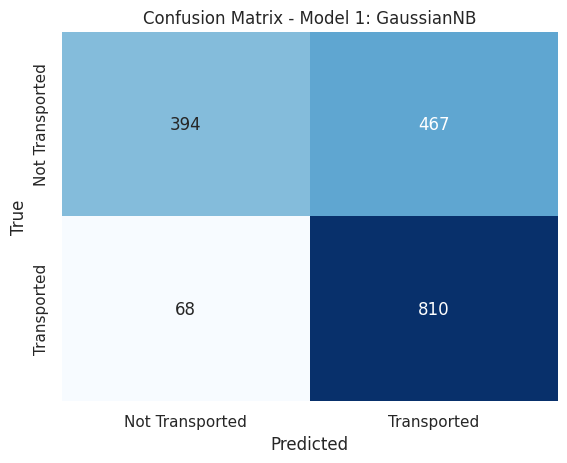

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7251293847038528


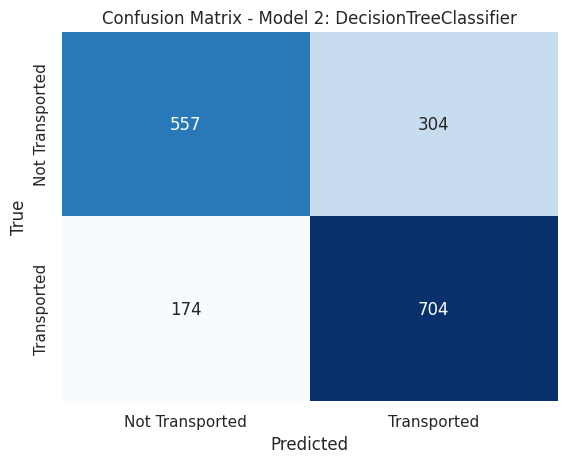

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.815933275812482
Testing Accuracy: 0.750431282346176


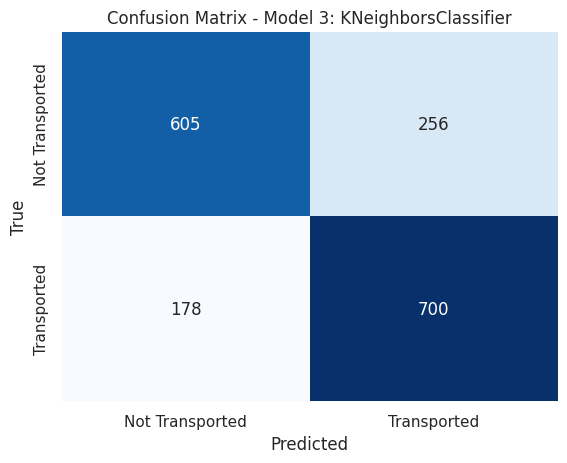

------------------
Model 4: RandomForestClassifier
Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7699827487061529


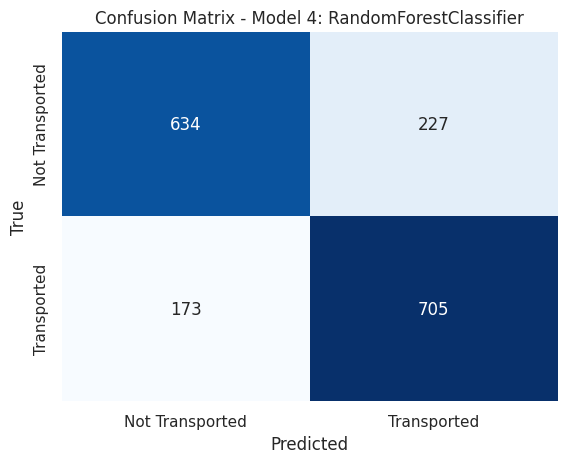

------------------
Model 5: LogisticRegression
Training Accuracy: 0.7786885245901639
Testing Accuracy: 0.7556066705002875


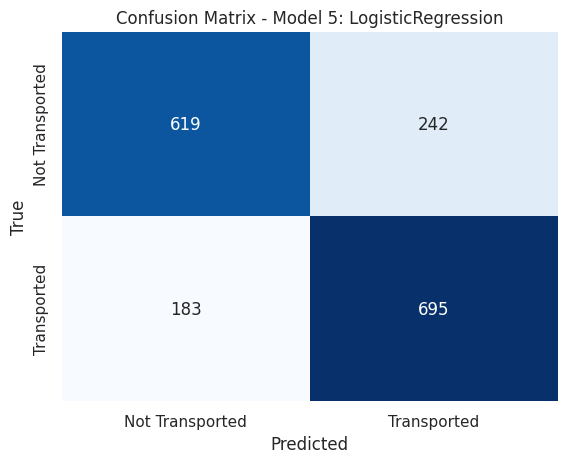

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.7970951970089157
Testing Accuracy: 0.7625071880391029


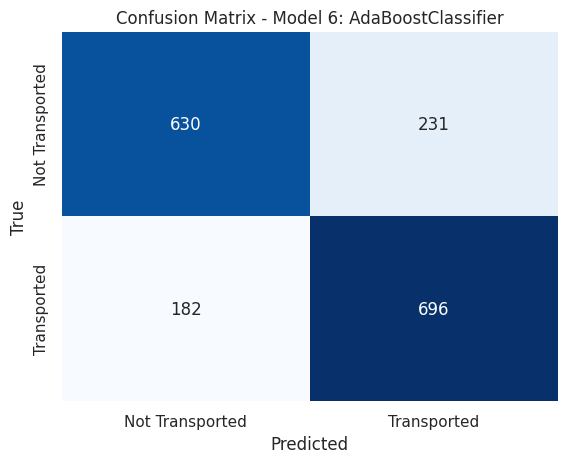

------------------
Model 7: SVC
Training Accuracy: 0.7893298820822549
Testing Accuracy: 0.7711328349626222


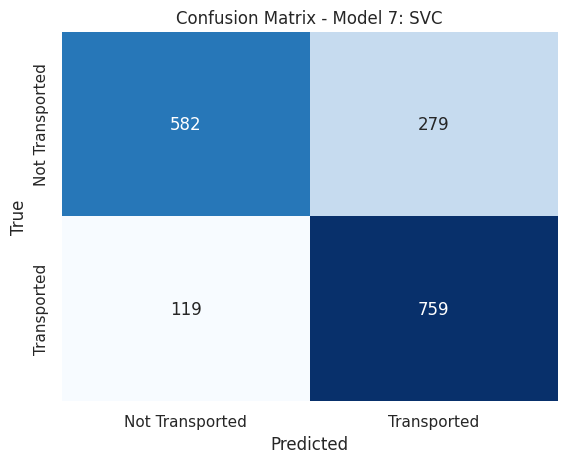

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.8146390566580385
Testing Accuracy: 0.7843588269120184


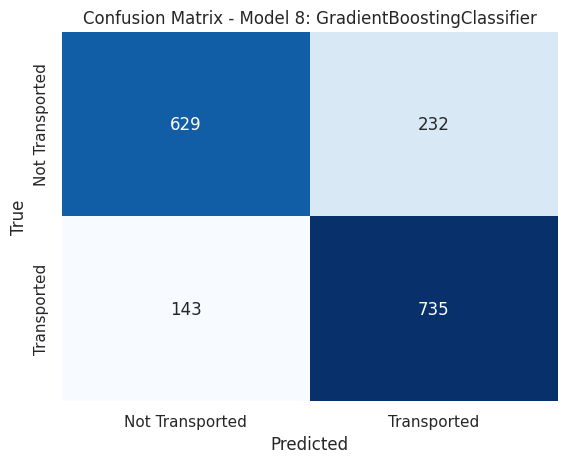

------------------
Model 9: XGBClassifier
Training Accuracy: 0.8802128271498418
Testing Accuracy: 0.7722829212190915


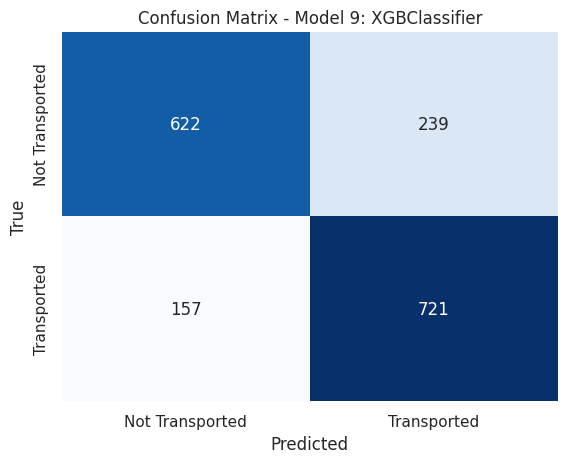

------------------


In [39]:
# plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not Transported", "Transported"],
                yticklabels=["Not Transported", "Transported"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

The analysis of a confusion matrix can be done by observing the four main values: true positives, false positives, true negatives, and false negatives. Let's analyze the values presented in the confusion matrix of the XGBClassifier model:





Definitions:
True Negatives (TN): 622 (the model correctly predicted that 618 instances would not be transported)
False Positives (FP): 239 (the model predicted that 243 instances would be transported, but they were not)
False Negatives (FN): 157 (the model predicted that 159 instances would not be transported, but they were)
True Positives (TP): 721 (the model correctly predicted that 719 instances would be transported)
Derived Metrics:
From the confusion matrix, we can calculate several important metrics:

Derived metrics:
Acuracy:Acuracy =(TP+TN)/ (TP+TN+FP+FN) =(721+622)/721+622+239+157=1337/1739≈0.769

Precision:Precision=TP/(TP+FP)=719/719+243≈0.747

Recall or Sensitivity:Recall=TP/(TP+FN)=719/719+159≈
0.819

F1-Score:F1=2×((Precision×Recall)/(Precision+Recall))=2×((0.747×0.819)/0.747+0.819≈0.781

Specificity:Specificity=TN/ (TN+FP) =618/(618+243)≈0.718


Model 1: GaussianNB
Training Accuracy: 0.6862237561115905
Testing Accuracy: 0.6923519263944796


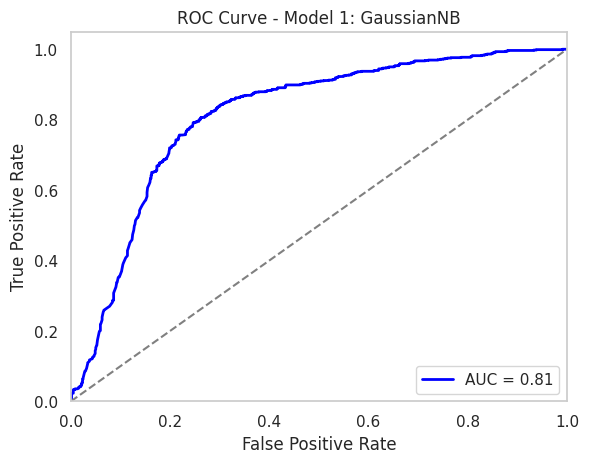

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7251293847038528


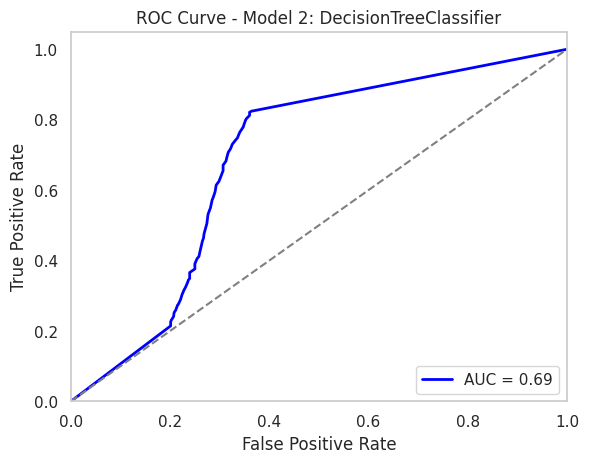

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.815933275812482
Testing Accuracy: 0.750431282346176


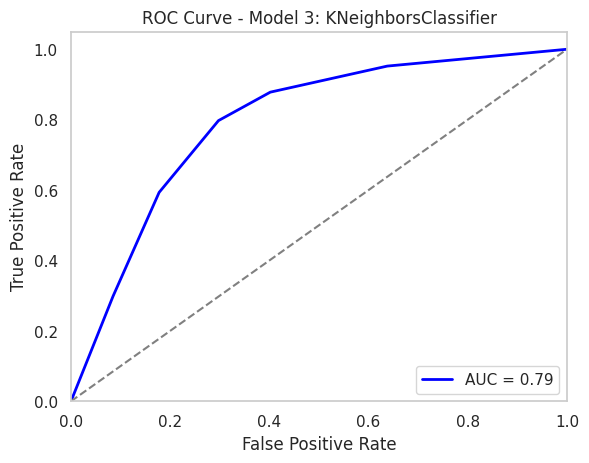

------------------
Model 4: RandomForestClassifier
Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7699827487061529


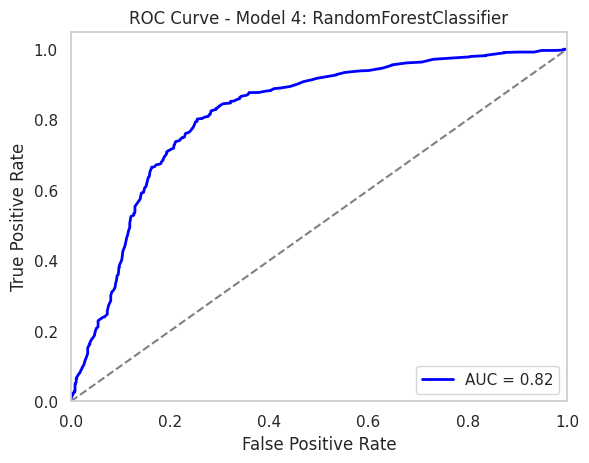

------------------
Model 5: LogisticRegression
Training Accuracy: 0.7786885245901639
Testing Accuracy: 0.7556066705002875


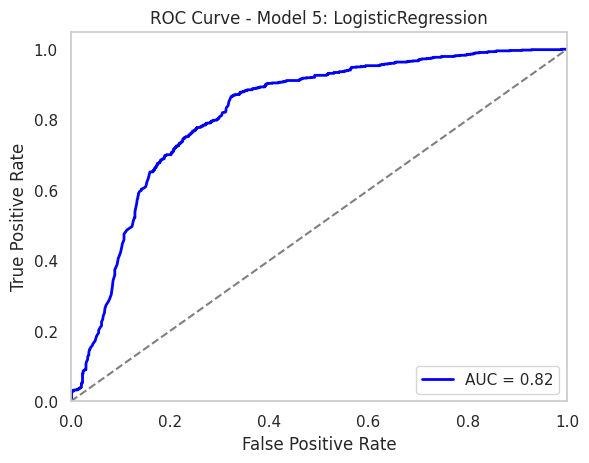

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.7970951970089157
Testing Accuracy: 0.7625071880391029


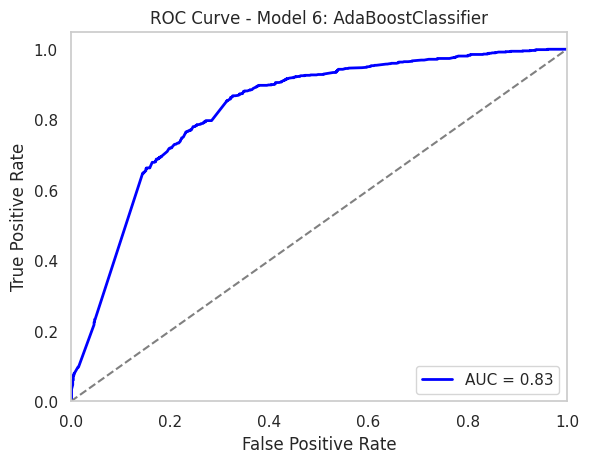

------------------
Model 7: SVC
Training Accuracy: 0.7893298820822549
Testing Accuracy: 0.7711328349626222


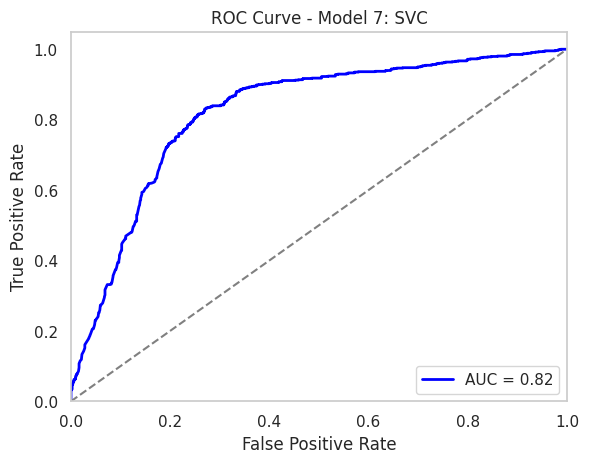

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.8146390566580385
Testing Accuracy: 0.7843588269120184


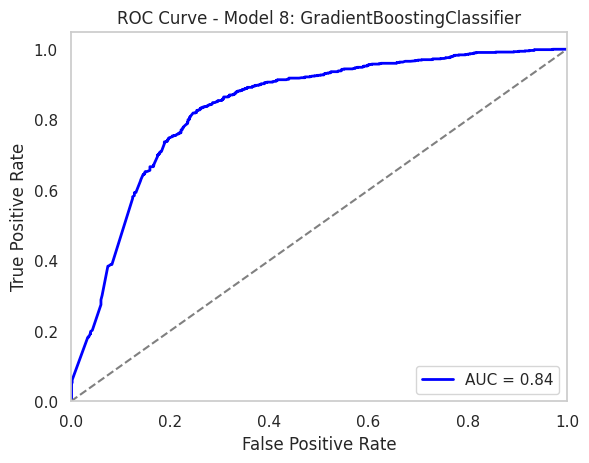

------------------
Model 9: XGBClassifier
Training Accuracy: 0.8802128271498418
Testing Accuracy: 0.7722829212190915


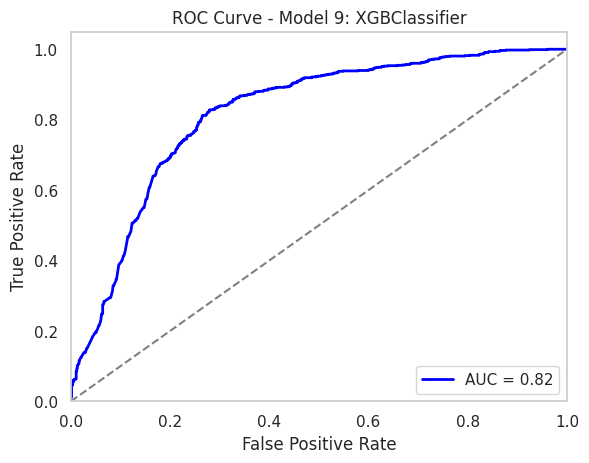

------------------


In [40]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

    print("------------------")

In [41]:
# Classification report
# Importing library - Classification report models
from sklearn.metrics import accuracy_score, classification_report

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Gerar relatório de classificação
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()

    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.6862237561115905
Testing Accuracy: 0.6923519263944796

Classification Report:

              precision    recall  f1-score   support

       False       0.85      0.46      0.60       861
        True       0.63      0.92      0.75       878

    accuracy                           0.69      1739
   macro avg       0.74      0.69      0.67      1739
weighted avg       0.74      0.69      0.67      1739



Model 2: DecisionTreeClassifier

Training Accuracy: 0.9255104975553639
Testing Accuracy: 0.7251293847038528

Classification Report:

              precision    recall  f1-score   support

       False       0.76      0.65      0.70       861
        True       0.70      0.80      0.75       878

    accuracy                           0.73      1739
   macro avg       0.73      0.72      0.72      1739
weighted avg       0.73      0.73      0.72      1739



Model 3: KNeighborsClassifier

Training Accuracy: 0.815933275812482
Testing Accuracy: 0

# **Analysis:**
Accuracy of approximately 76.9% indicates that the model is correct in most predictions.
Precision of 74.7% suggests that when the model predicts an instance will be transported, it is correct about 74.7% of the time.
Recall of 81.9% shows that the model can identify 81.9% of instances that are actually transported.
F1-Score of 78.1% is a balance between precision and recall, indicating a good overall performance of the model.
Specificity of 71.8% indicates that the model is moderately good at correctly predicting instances that are not transported.
Conclusion:
The XGBClassifier model shows reasonably good performance based on the metrics derived from the confusion matrix. The precision and recall are balanced, resulting in a solid F1-Score. However, there is room for improvement, especially in reducing the number of false positives and false negatives to increase both precision and specificity.

Analysis of the ROC Curve
The ROC (Receiver Operating Characteristic) curve is a graphical tool used to evaluate the performance of a binary classification model. Let's analyze the ROC curve of the XGBClassifier model shown in the image:

Elements of the ROC Curve:
Y-Axis (True Positive Rate - TPR): Also known as sensitivity or recall, it represents the true positive rate. It is calculated as:
TPR=TP/TP+FN

X-Axis (False Positive Rate - FPR): It represents the false positive rate. It is calculated as:
FPR=FP/FP+TN

Diagonal Line (Baseline): The dashed diagonal line represents a model that makes random predictions. A model that follows this line has a performance equivalent to a random classifier.

ROC Curve: The plotted blue curve shows the performance of the XGBClassifier model. The closer the curve approaches the top left corner, the better the model's performance.

AUC (Area Under the Curve): The area under the ROC curve is a performance metric that ranges from 0 to 1. A value of 0.5 indicates random performance, while a value of 1.0 indicates perfect performance. In this case, the AUC is 0.82, indicating good model performance.

Analysis of the ROC Curve:
True Positive Rate: The true positive rate increases rapidly at the beginning, indicating that the model is good at identifying true positives while keeping the false positive rate low.
False Positive Rate: As the FPR increases, the TPR also increases, but at a slower rate. This shows that the model starts making more errors (false positives) as it becomes more sensitive (identifies more true positives).
Overall Performance: With an AUC of 0.82, the XGBClassifier model shows a good balance between sensitivity and specificity. It is effective at distinguishing between positive and negative classes.
Conclusion:
The ROC curve and the AUC of 0.82 indicate that the XGBClassifier model performs well in the classification task. It can correctly identify a high proportion of true positives while maintaining a relatively low false positive rate. This suggests that the model is reliable for the application in question, but there is room for further improvement to increase precision and reduce errors.

### **Key Metrics in the Classification Report:**
**Precision:**
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "What proportion of predicted positives is actually correct?"

Formula: Precision =  TP/(TP+FP)

**Recall (Sensitivity):**
Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "What proportion of actual positives is correctly identified?"

Formula: Recall = TP/(TP+FN)

**F1-Score:**
F1-Score is the weighted average of Precision and Recall. It is useful when the class distribution is imbalanced.

Formula: F1-Score = 2∗ ((Precision∗Recall)/(Precision + Recall))

**Support:**
Support is the number of actual occurrences of the class in the dataset.

**Classification Report Analysis:**

**Training and Testing Accuracy:**

Training Accuracy: 0.8802

This means the model correctly classified approximately 88% of the training data.


Testing Accuracy: 0.7723


This means the model correctly classified approximately 77% of the testing data.


**Class-wise Metrics:**


False Class (Negative Class):


Precision: 0.80

80% of the instances predicted as False are actually False.


Recall: 0.72

72% of the actual False instances are correctly identified by the model.

F1-Score: 0.76

This is the harmonic mean of precision and recall, indicating a balance between them.

Support: 861

There are 861 instances of the False class in the test set.

**True Class (Positive Class):**

Precision: 0.75

75% of the instances predicted as True are actually True.

Recall: 0.82

82% of the actual True instances are correctly identified by the model.

F1-Score: 0.78

This is the harmonic mean of precision and recall, indicating a balance between them.

Support: 878

There are 878 instances of the True class in the test set.

**Overall Metrics:**

Accuracy: 0.77

The overall accuracy of the model on the test set is 77%.

Macro Average:
Precision: 0.77

Average precision over both classes.

Recall: 0.77

Average recall over both classes.

F1-Score: 0.77
Average F1-Score over both classes.

**Weighted Average:**

These metrics take into account the support (the number of true instances for each class) to compute the average. This is important when there is a class imbalance.

# **Conclusion:**
The XGBClassifier shows good performance with a balanced precision and recall for both classes.
The higher training accuracy compared to testing accuracy indicates the model performs better on the training set, which might suggest some degree of overfitting.
The model performs consistently across both classes, with slightly better recall for the True class and better precision for the False class.
Overall, the metrics suggest the model is reliable but has room for improvement, especially in balancing precision and recall.